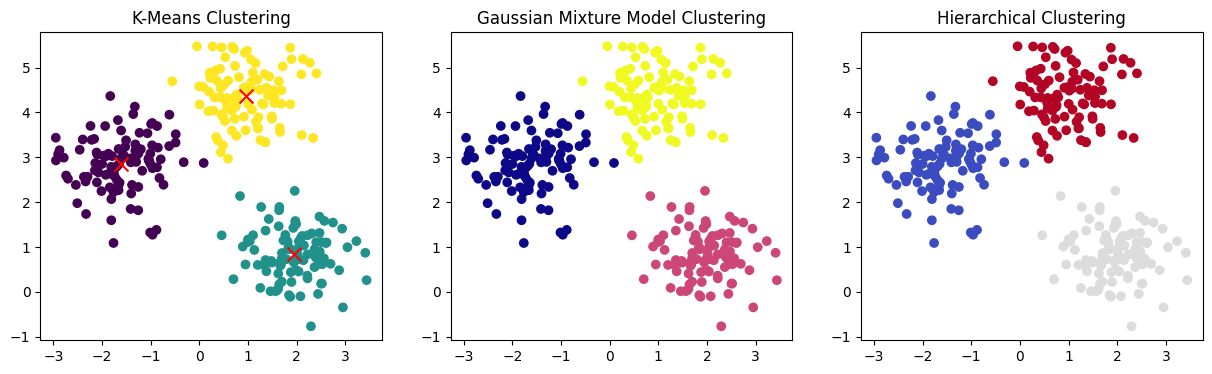

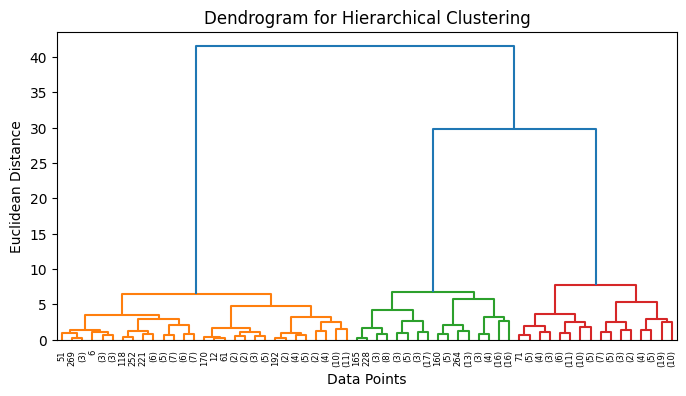

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

X, y_true = make_blobs(
    n_samples=300, centers=3, cluster_std=0.60, random_state=0
)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)

hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].scatter(kmeans.cluster_centers_[:, 0],
               kmeans.cluster_centers_[:, 1],
               c='red', s=100, marker='x')
axs[0].set_title("K-Means Clustering")

axs[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='plasma')
axs[1].set_title("Gaussian Mixture Model Clustering")

axs[2].scatter(X[:, 0], X[:, 1], c=hier_labels, cmap='coolwarm')
axs[2].set_title("Hierarchical Clustering")

plt.show()

linked = linkage(X, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

Explained variance by each principal component:
[0.72962445 0.22850762]


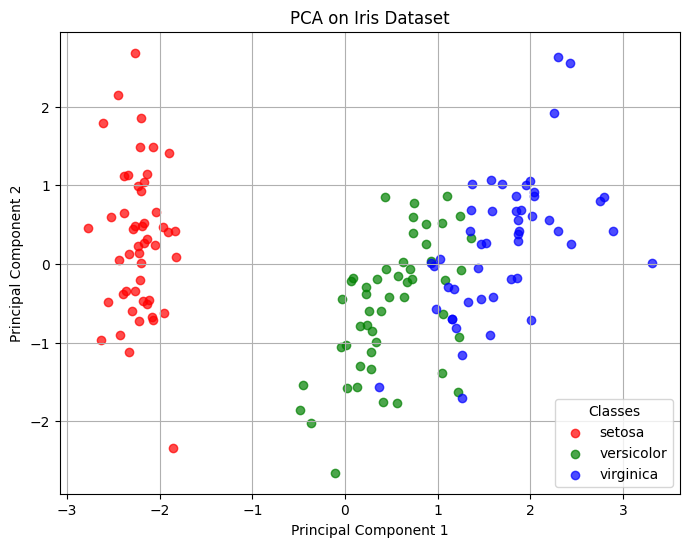

Original shape: (150, 4)
Reduced shape: (150, 2)


In [2]:
# Experiment 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by each principal component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        alpha=0.7,
        label=target_name
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend(title="Classes")
plt.grid(True)
plt.show()

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")

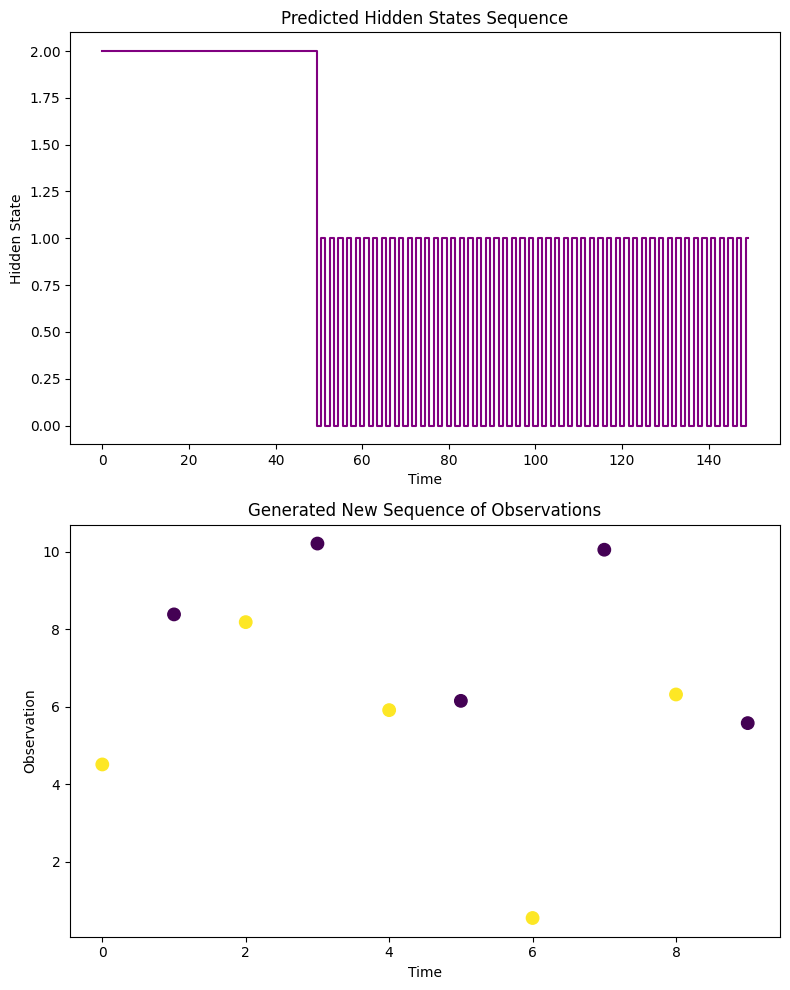

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

np.random.seed(42)
X1 = np.random.normal(0, 1, (50, 1))
X2 = np.random.normal(5, 1, (50, 1))
X3 = np.random.normal(10, 1, (50, 1))

X = np.vstack([X1, X2, X3])
lengths = [50, 50, 50]

model = hmm.GaussianHMM(n_components=3, covariance_type="full",
                        n_iter=100, random_state=42)
model.fit(X, lengths)

hidden_states = model.predict(X)

X_generated, Z_generated = model.sample(10)

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.title("Predicted Hidden States Sequence")
plt.plot(hidden_states, drawstyle="steps-mid", color="purple")
plt.xlabel("Time")
plt.ylabel("Hidden State")

plt.subplot(2, 1, 2)
plt.title("Generated New Sequence of Observations")
plt.scatter(range(len(X_generated)), X_generated, c=Z_generated,
            cmap="viridis", s=80)
plt.xlabel("Time")
plt.ylabel("Observation")

plt.tight_layout()
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


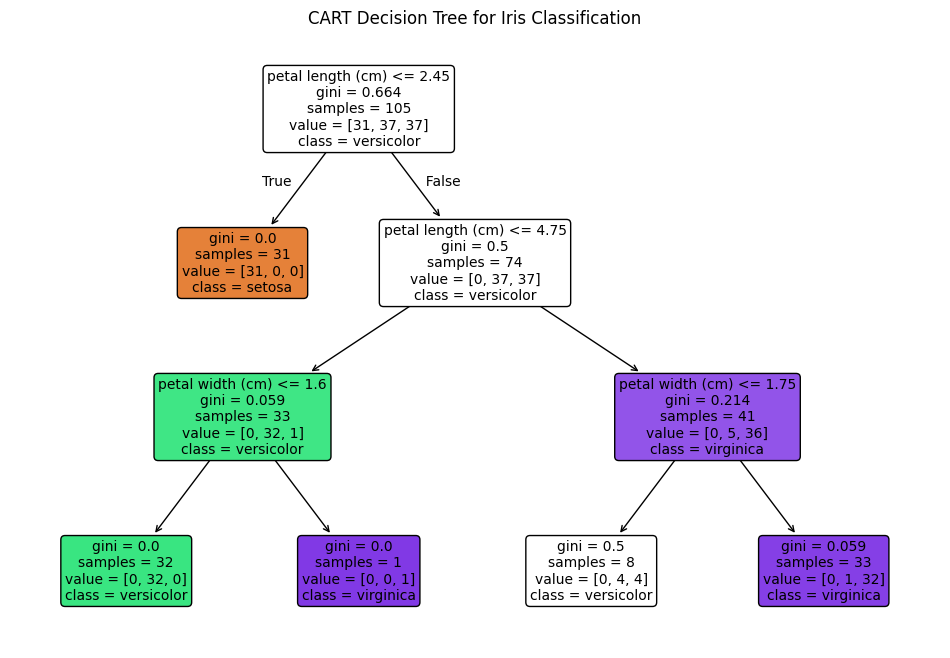

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,
      y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("CART Decision Tree for Iris Classification")
plt.show()


--- Random Forest Results ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

--- AdaBoost Results ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  

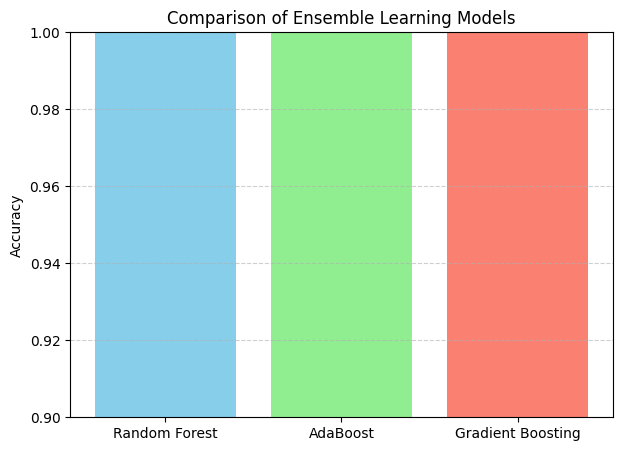

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100,
                                          random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100,
                                                   random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n--- {name} Results ---")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test,
          y_pred, target_names=target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(7, 5))
plt.bar(results.keys(), results.values(), color=["skyblue",
                                               "lightgreen", "salmon"])
plt.title("Comparison of Ensemble Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()